### Лабораторная работа 5

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

1. Задача о светофоре. Обучение на 1 точке данных

In [8]:
weights = np.array([0.5, 0.48, -0.7])
learning_rate = 0.1

#набор данных, состоящий из 6 наблюдений
streetlights = np.array([  [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ]])
#метки класса для 6 наблюдений
walk_vs_stop = np.array([ 0, 1, 0, 1, 1, 0 ])

input = streetlights[0] # [1, 0, 1]
goal_prediction = walk_vs_stop[0] #  0 - стоять

for iteration in range(10):
    prediction = input.dot(weights)
    error = (prediction - goal_prediction) ** 2

    weight_corrections = 2 * (prediction - goal_prediction) * input #получаем вектор из 3х величин для коррекции 3х весов
    print("Weight corrections: "+ str(weight_corrections))

    weights = weights - (learning_rate *  weight_corrections)

    print("Error:" + str(error) + " Prediction:" + str(prediction))

Weight corrections: [-0.4 -0.  -0.4]
Error:0.03999999999999998 Prediction:-0.19999999999999996
Weight corrections: [-0.24 -0.   -0.24]
Error:0.014399999999999972 Prediction:-0.11999999999999988
Weight corrections: [-0.144 -0.    -0.144]
Error:0.005183999999999977 Prediction:-0.07199999999999984
Weight corrections: [-0.0864 -0.     -0.0864]
Error:0.0018662399999999919 Prediction:-0.043199999999999905
Weight corrections: [-0.05184 -0.      -0.05184]
Error:0.000671846399999997 Prediction:-0.025919999999999943
Weight corrections: [-0.031104 -0.       -0.031104]
Error:0.00024186470400000033 Prediction:-0.01555200000000001
Weight corrections: [-0.0186624 -0.        -0.0186624]
Error:8.707129344000177e-05 Prediction:-0.009331200000000095
Weight corrections: [-0.01119744 -0.         -0.01119744]
Error:3.134566563840064e-05 Prediction:-0.005598720000000057
Weight corrections: [-0.00671846 -0.         -0.00671846]
Error:1.1284439629823931e-05 Prediction:-0.0033592319999999898
Weight corrections:

2. Задача о светофоре. Реализуйте стохастический градиентный спуск на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration.

In [34]:
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array([ 0, 1, 0, 1, 1, 0 ])

weights = np.array([0.5, 0.48, -0.7])
learning_rate = 0.1
epochs = 5

losses = []
print(f'Old weights = {weights}')
for e in range(epochs):
    print(f'Epoch: {e + 1}')
    for i in range(len(streetlights)): # six terations:
        input = streetlights[i] # e.g. [1, 0, 1]
        goal = walk_vs_stop[i]
        pred = input @ weights
        grads = 2.0 * (pred - goal) * input
        weights = weights - learning_rate * grads
        errors = (streetlights @ weights - walk_vs_stop) ** 2
        mean_error = sum(errors) / len(errors)
        losses.append(mean_error)
        print(f"Iteration: {i + 1}, Pred = {pred:.5f}, Mean Error = {mean_error:.5f}")
print(f'New weights = {weights}')

Old weights = [ 0.5   0.48 -0.7 ]
Epoch: 1
Iteration: 1, Pred = -0.20000, Mean Error = 0.60980
Iteration: 2, Pred = -0.18000, Mean Error = 0.20624
Iteration: 3, Pred = -0.42400, Mean Error = 0.16323
Iteration: 4, Pred = 0.91680, Mean Error = 0.15179
Iteration: 5, Pred = 0.41008, Mean Error = 0.09690
Iteration: 6, Pred = 0.35206, Mean Error = 0.08814
Epoch: 2
Iteration: 1, Pred = 0.21124, Mean Error = 0.09479
Iteration: 2, Pred = 0.53339, Mean Error = 0.05511
Iteration: 3, Pred = -0.22391, Mean Error = 0.05443
Iteration: 4, Pred = 1.20879, Mean Error = 0.05411
Iteration: 5, Pred = 0.68130, Mean Error = 0.04374
Iteration: 6, Pred = 0.24507, Mean Error = 0.03566
Epoch: 3
Iteration: 1, Pred = 0.14704, Mean Error = 0.03657
Iteration: 2, Pred = 0.73036, Mean Error = 0.02533
Iteration: 3, Pred = -0.18164, Mean Error = 0.02594
Iteration: 4, Pred = 1.19834, Mean Error = 0.02401
Iteration: 5, Pred = 0.79521, Mean Error = 0.01937
Iteration: 6, Pred = 0.14011, Mean Error = 0.01672
Epoch: 4
Iterati

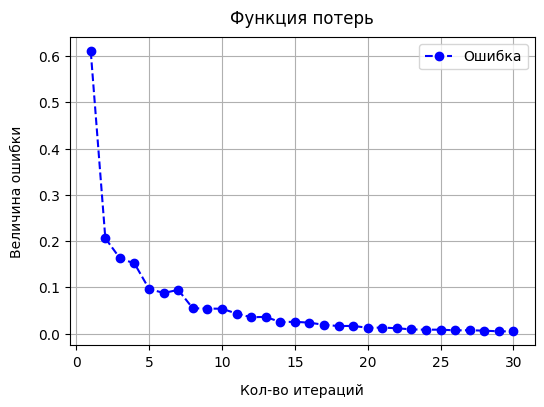

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title('Функция потерь', fontsize=12, pad=10)
ax.set_xlabel('Кол-во итераций', fontsize=10, labelpad=10)
ax.set_ylabel('Величина ошибки', fontsize=10, labelpad=10)
x = [i + 1 for i in range(epochs * len(streetlights))]
ax.plot(x, losses, color='blue', linestyle='--', marker='o', label='Ошибка')
#ax.scatter(x, losses, color='blue', marker='o', s=25)
ax.grid(visible=True)
ax.legend(loc='upper right')
plt.show()

3. Попробуйте получить прогноз для какого-нибудь примера на ваше усмотрение. Попробуйте получить прогноз для какого-нибудь примера, где яркость секций светофора измеряется от 0 до 1. Например, [0.9, 0.1, 0.7]. Сделайте выводы о полученных прогнозах сети.

In [57]:
ind = 0
print(f'Прогноз для input = {streetlights[ind]}: {streetlights[ind] @ weights}')
print(f'Истина: {walk_vs_stop[ind]}')

ind = 1
print(f'Прогноз для input = {streetlights[ind]}: {streetlights[ind] @ weights}')
print(f'Истина: {walk_vs_stop[ind]}')

input = np.array([0.9, 0.1, 0.7])
print(f'Прогноз для input = {input}: {input @ weights}')
print(f'Подразумеваемая истина: {0.0}')

Прогноз для input = [1 0 1]: 0.021634190008528814
Истина: 0
Прогноз для input = [0 1 1]: 0.9358628263813051
Истина: 1
Прогноз для input = [0.9 0.1 0.7]: 0.15018383741566987
Подразумеваемая истина: 0.0


**Вывод: нейронная сеть придает наибольший вес второму признаку и практически не учитывает все остальные.**

4. Реализуйте полный градиентный спуск или стохастический градиентный спуск по мини-батчам (размер батча = 2) на полном наборе данных. Выведите веса сети после обучения. Постройте график error/iteration.

In [70]:
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array([ 0, 1, 0, 1, 1, 0 ])

weights = np.array([0.5, 0.48, -0.7])
learning_rate = 0.1
epochs = 5
batch_size = 2

losses = []
print(f'Old weights = {weights}')
for e in range(epochs):
    print(f'Epoch: {e + 1}')
    for i in range(len(streetlights) // batch_size): # three terations:
        start_ind = i * batch_size
        input = streetlights[start_ind : start_ind + batch_size]
        goal = walk_vs_stop[start_ind : start_ind + batch_size]
        pred = input @ weights
        grads = (2.0 * (pred - goal)) @ input
        grads = grads / batch_size
        weights = weights - learning_rate * grads
        errors = (streetlights @ weights - walk_vs_stop) ** 2
        mean_error = sum(errors) / len(errors)
        losses.append(mean_error)
        print(f"Iteration: {i + 1}, Pred = {pred}, Mean Error = {mean_error:.5f}")
print(f'New weights = {weights}')

Old weights = [ 0.5   0.48 -0.7 ]
Epoch: 1
Iteration: 1, Pred = [-0.2  -0.22], Mean Error = 0.38870
Iteration: 2, Pred = [-0.558  0.564], Mean Error = 0.26942
Iteration: 3, Pred = [0.187 0.105], Mean Error = 0.18171
Epoch: 2
Iteration: 1, Pred = [0.1653 0.3391], Mean Error = 0.13129
Iteration: 2, Pred = [-0.33824  0.99132], Mean Error = 0.12031
Iteration: 3, Pred = [0.49031 0.23389], Mean Error = 0.09469
Epoch: 3
Iteration: 1, Pred = [0.238081 0.568859], Mean Error = 0.07695
Iteration: 2, Pred = [-0.256662  1.12152 ], Mean Error = 0.07528
Iteration: 3, Pred = [0.6326413 0.2349411], Mean Error = 0.06235
Epoch: 4
Iteration: 1, Pred = [0.22468875 0.68261893], Mean Error = 0.05253
Iteration: 2, Pred = [-0.22063681  1.15575218], Mean Error = 0.05133
Iteration: 3, Pred = [0.71453951 0.20240235], Mean Error = 0.04339
Epoch: 5
Iteration: 1, Pred = [0.19046793 0.75139138], Mean Error = 0.03720
Iteration: 2, Pred = [-0.20002846  1.15932998], Mean Error = 0.03600
Iteration: 3, Pred = [0.77020316 

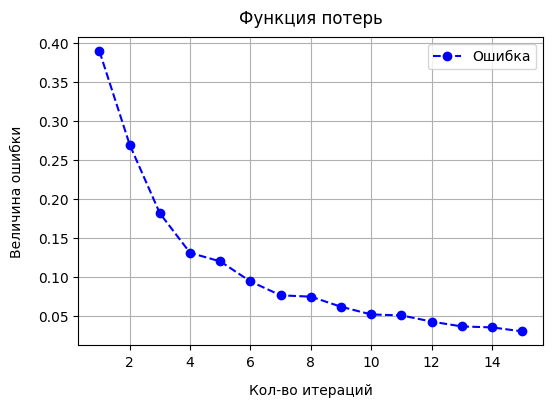

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title('Функция потерь', fontsize=12, pad=10)
ax.set_xlabel('Кол-во итераций', fontsize=10, labelpad=10)
ax.set_ylabel('Величина ошибки', fontsize=10, labelpad=10)
x = [i + 1 for i in range(epochs * (len(streetlights) // batch_size))]
ax.plot(x, losses, color='blue', linestyle='--', marker='o', label='Ошибка')
ax.grid(visible=True)
ax.legend(loc='upper right')
plt.show()